In [40]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [41]:
combined = pd.concat([train_df,test_df])
all_data = [train_df,test_df]

In [42]:
total = combined.isnull().sum().sort_values(ascending=False)
percent_1 = combined.isnull().sum()/combined.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageQual,159,5.4
GarageYrBlt,159,5.4
GarageFinish,159,5.4


In [43]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### MSZoning

In [44]:
combined['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [45]:
combined.groupby('MSZoning')['Id'].count()

MSZoning
C (all)      25
FV          139
RH           26
RL         2265
RM          460
Name: Id, dtype: int64

In [46]:
train_df.groupby('MSZoning')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
FV,65.0,214014.061538,52369.662067,144152.0,174000.00,205950.0,250000.0,370878.0
RH,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1151.0,191004.994787,80766.341319,39300.0,137700.00,174000.0,224700.0,755000.0
RM,218.0,126316.830275,48521.689833,37900.0,100000.00,120500.0,140000.0,475000.0


In [47]:
combined[combined['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


#### Summary
Based on all this, I think we can default the MSZoning null values (which only appear in the test data set) with the most frequent value 'RL'. We can also convert 'RL' to number.

In [48]:
MSZoningMap = {'FV': 1, 'RL': 2, 'RH': 3, 'RM': 4, 'C (all)': 5}

for d in all_data:
    d['MSZoning'] = d['MSZoning'].fillna('RL')
    d['MSZoning'] = d['MSZoning'].map(MSZoningMap)

combined['MSZoning'] = combined['MSZoning'].fillna('RL')
combined['MSZoning'] = combined['MSZoning'].map(MSZoningMap)
    
combined['MSZoning'].unique()

array([2, 4, 5, 1, 3], dtype=int64)

In [49]:
all_data[0].groupby('MSZoning')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
5,10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
4,218.0,126316.830275,48521.689833,37900.0,100000.00,120500.0,140000.0,475000.0
3,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
2,1151.0,191004.994787,80766.341319,39300.0,137700.00,174000.0,224700.0,755000.0
1,65.0,214014.061538,52369.662067,144152.0,174000.00,205950.0,250000.0,370878.0


### MSSubClass

In [50]:
subclass_map = train_df.groupby('MSSubClass')['SalePrice'].mean().sort_values()
for d in all_data:
    for idx, s in enumerate(subclass_map.index):
        d.loc[d['MSSubClass'] == s,'MSSubClass'] = idx+1

        
for idx, s in enumerate(subclass_map.index):
    combined.loc[combined['MSSubClass'] == s,'MSSubClass'] = idx+1

train_df.groupby('MSSubClass')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
MSSubClass,,,,,,,,
1,69.0,95829.724638,24857.110083,34900.0,81000.0,99900.0,110500.0,163500.0
2,10.0,102300.000000,29474.282575,75500.0,81875.0,88500.0,128000.0,148000.0
3,12.0,108591.666667,20231.723889,76000.0,94125.0,107500.0,122250.0,139400.0
4,30.0,129613.333333,35439.097670,55000.0,108875.0,128250.0,143750.0,228950.0
5,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
6,63.0,138647.380952,34587.542266,75000.0,114000.0,146000.0,164850.0,239000.0
7,144.0,143302.972222,54851.983707,37900.0,114125.0,132000.0,159000.0,410000.0
8,20.0,147810.000000,19629.942220,123000.0,134350.0,140750.0,158375.0,198500.0
9,4.0,156125.000000,75747.799748,79500.0,119625.0,142500.0,179000.0,260000.0


In [51]:
combined['MSSubClass'].isnull().sum()

0

In [52]:
# import seaborn as sns
# %matplotlib inline
# from matplotlib import pyplot as plt
# from matplotlib import style

# grid = sns.FacetGrid(train_df, col='MSZoning', row='MSSubClass', height=2.0, aspect=1.6)
# grid.map(plt.hist, 'SalePrice', alpha=.5, bins=20)
# grid.add_legend();

#### Summary
I don't see much coorelation directly between this and sale price but not sure at this point.  For now, will check other features to see if this might be useful in some way or if it should be dropped.

### LotFrontage

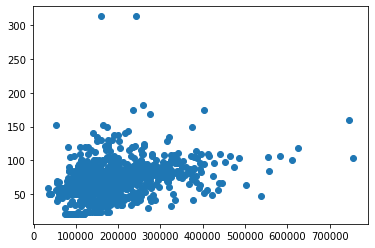

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(y_train, X_train['LotFrontage'])
plt.show()

In [54]:
#pd.qcut(combined['LotFrontage'], 6)

# combined['LotFrontage'] = combined['LotFrontage'].fillna(0)
# combined.loc[combined['LotFrontage'] <= 21, 'LotFrontage'] = 1
# combined.loc[(combined['LotFrontage'] > 21) & (combined['LotFrontage'] <= 53), 'LotFrontage'] = 2
# combined.loc[(combined['LotFrontage'] > 53) & (combined['LotFrontage'] <= 63), 'LotFrontage'] = 3
# combined.loc[(combined['LotFrontage'] > 63) & (combined['LotFrontage'] <= 73), 'LotFrontage'] = 4
# combined.loc[(combined['LotFrontage'] > 73) & (combined['LotFrontage'] <= 84), 'LotFrontage'] = 5
# combined.loc[combined['LotFrontage'] > 84, 'LotFrontage'] = 6
# combined['LotFrontage'] = combined['LotFrontage'].astype(int)
    

# for d in all_data:
#     d['LotFrontage'] = d['LotFrontage'].fillna(0)
#     d.loc[d['LotFrontage'] <= 21, 'LotFrontage'] = 1
#     d.loc[(d['LotFrontage'] > 21) & (d['LotFrontage'] <= 53), 'LotFrontage'] = 2
#     d.loc[(d['LotFrontage'] > 53) & (d['LotFrontage'] <= 63), 'LotFrontage'] = 3
#     d.loc[(d['LotFrontage'] > 63) & (d['LotFrontage'] <= 73), 'LotFrontage'] = 4
#     d.loc[(d['LotFrontage'] > 73) & (d['LotFrontage'] <= 84), 'LotFrontage'] = 5
#     d.loc[d['LotFrontage'] > 84, 'LotFrontage'] = 6
#     d['LotFrontage'] = d['LotFrontage'].astype(int)

# all_data[0].groupby('LotFrontage')['SalePrice'].describe()

In [55]:
# Use mean normalization
combined['LotFrontage'] = combined['LotFrontage'].fillna(0)

for d in all_data:
    d['LotFrontage'] = d['LotFrontage'].fillna(0)
    d['LotFrontage'] = (d['LotFrontage']-combined['LotFrontage'].mean())/combined['LotFrontage'].std()
    
    
combined['LotFrontage'] = (combined['LotFrontage']-combined['LotFrontage'].mean())/combined['LotFrontage'].std()

#### Summary:
Lot frontage is loosey coorelated to sale price so we probably have to add some features to take advantage of this.  I've put these into categories for now.

### LotArea

In [56]:
all_data[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,15,2,0.216038,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,12,2,0.664045,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,15,2,0.305639,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,10,2,0.066702,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,15,2,0.783513,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


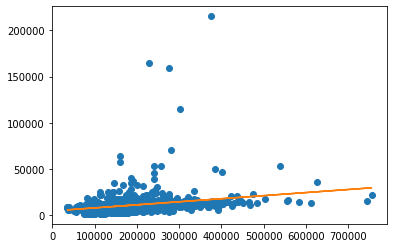

In [57]:
plt.plot(y_train, X_train['LotArea'], 'o')
m, b = np.polyfit(y_train, X_train['LotArea'], 1)
plt.plot(y_train, m*y_train + b)

In [58]:
# pd.qcut(combined['LotArea'], 6)

# combined['LotArea'] = combined['LotArea'].fillna(0)
# combined.loc[combined['LotArea'] <= 6294.667, 'LotArea'] = 1
# combined.loc[(combined['LotArea'] > 6294.667) & (combined['LotArea'] <= 8208.0), 'LotArea'] = 2
# combined.loc[(combined['LotArea'] > 8208.0) & (combined['LotArea'] <= 9453.0), 'LotArea'] = 3
# combined.loc[(combined['LotArea'] > 9453.0) & (combined['LotArea'] <= 10710.667), 'LotArea'] = 4
# combined.loc[(combined['LotArea'] > 10710.667) & (combined['LotArea'] <= 12774.0), 'LotArea'] = 5
# combined.loc[combined['LotArea'] > 12774.0, 'LotArea'] = 6
# combined['LotArea'] = combined['LotArea'].astype(int)
    

# for d in all_data:
#     d['LotArea'] = d['LotArea'].fillna(0)
#     d.loc[d['LotArea'] <= 6294.667, 'LotArea'] = 1
#     d.loc[(d['LotArea'] > 6294.667) & (d['LotArea'] <= 8208.0), 'LotArea'] = 2
#     d.loc[(d['LotArea'] > 8208.0) & (d['LotArea'] <= 9453.0), 'LotArea'] = 3
#     d.loc[(d['LotArea'] > 9453.0) & (d['LotArea'] <= 10710.667), 'LotArea'] = 4
#     d.loc[(d['LotArea'] > 10710.667) & (d['LotArea'] <= 12774.0), 'LotArea'] = 5
#     d.loc[d['LotArea'] > 12774.0, 'LotArea'] = 6
#     d['LotArea'] = d['LotArea'].astype(int)

# all_data[0].head(10)

In [59]:
# Use mean normalization
combined['LotArea'] = combined['LotArea'].fillna(0)

for d in all_data:
    d['LotArea'] = d['LotArea'].fillna(0)
    d['LotArea'] = (d['LotArea']-combined['LotArea'].mean())/combined['LotArea'].std()

combined['LotArea'] = (combined['LotArea']-combined['LotArea'].mean())/combined['LotArea'].std()

#### Summary
The lot area is correlated to the price so we'll normalize it.

### Street and Alley

In [60]:
combined['Alley'] = combined['Alley'].fillna('None')

for d in all_data:
    d['Alley'] = d['Alley'].fillna('None')

In [61]:
combined.groupby(['Street', 'Alley']).describe()

Id                                                         \
               count         mean         std   min    25%     50%      75%   
Street Alley                                                                  
Grvl   None     12.0  1421.166667  884.029908  53.0  755.5  1394.0  2151.75   
Pave   Grvl    120.0  1596.150000  843.252114  22.0  807.5  1789.5  2260.50   
       None   2709.0  1456.209671  843.259783   1.0  728.0  1451.0  2191.00   
       Pave     78.0  1388.153846  814.670503  31.0  703.0  1404.5  2035.50   

                     MSSubClass             ...   YrSold         SalePrice  \
                 max      count       mean  ...      75%     max     count   
Street Alley                                ...                              
Grvl   None   2894.0       12.0   5.916667  ...  2009.25  2010.0       6.0   
Pave   Grvl   2872.0      120.0   6.858333  ...  2009.00  2010.0      50.0   
       None   2919.0     2709.0  11.003322  ...  2009.00  2010.0    1363.0   
       Pave   2796.0       78.0   8.679487  ...  2009.00  2010.0      41.0   

                                                                        \
                       mean           std      min       25%       50%   
Street Alley                                                             
Grvl   None   130190.500000  65446.253991  55993.0   88250.0  114250.0   
Pave   Grvl   122219.080000  34780.780734  52500.0  105312.5  119500.0   
       None   183686.592076  80669.563186  34900.0  131000.0  165000.0   
       Pave   168000.585366  38370.375243  40000.0  151000.0  172500.0   

                                  
                   75%       max  
Street Alley                      
Grvl   None   169650.0  228950.0  
Pave   Grvl   136750.0  256000.0  
       None   217750.0  755000.0  
       Pave   185000.0  265979.0  

[4 rows x 312 columns]

In [62]:
all_data[0].groupby('Street')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Street,,,,,,,,
Grvl,6.0,130190.500000,65446.253991,55993.0,88250.0,114250.0,169650.0,228950.0
Pave,1454.0,181130.538514,79446.597317,34900.0,130000.0,163000.0,214000.0,755000.0


#### Summary
I don't think either of these features really contribute at all so I'm going to drop them.

In [63]:
combined.drop(['Street','Alley'], axis=1, inplace=True)

for d in all_data:
    d.drop(['Street','Alley'], axis=1, inplace=True)

### Drop unused fields

In [64]:
combined.drop(['LotShape','LandContour', 'Utilities', 'LandSlope', \
               'Condition1', 'Condition2', 'YearBuilt', 'RoofStyle', \
               'RoofMatl', 'Heating', 'Electrical', 'Functional', \
               'GarageYrBlt', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', \
               'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', \
               'SaleType'], axis=1, inplace=True)

for d in all_data:
    d.drop(['LotShape','LandContour', 'Utilities', 'LandSlope', \
            'Condition1', 'Condition2', 'YearBuilt', 'RoofStyle', \
            'RoofMatl', 'Heating', 'Electrical', 'Functional', \
            'GarageYrBlt', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', \
            'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', \
            'SaleType'], axis=1, inplace=True)

### LotConfig

In [65]:
subclass_map = train_df.groupby('LotConfig')['SalePrice'].mean().sort_values()
for d in all_data:
    for idx, s in enumerate(subclass_map.index):
        d.loc[d['LotConfig'] == s,'LotConfig'] = idx+1

        
for idx, s in enumerate(subclass_map.index):
    combined.loc[combined['LotConfig'] == s,'LotConfig'] = idx+1

train_df.groupby('LotConfig')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
1,1052.0,176938.047529,76426.805787,34900.0,128000.0,159697.5,207125.0,611657.0
2,47.0,177934.574468,62788.926829,81000.0,143500.0,165000.0,194500.0,394617.0
3,263.0,181623.425856,84466.041222,52500.0,129250.0,160000.0,220000.0,755000.0
4,4.0,208475.000000,78379.222374,128000.0,169925.0,195450.0,234000.0,315000.0
5,94.0,223854.617021,93117.546586,84000.0,156475.0,199262.0,269342.5,625000.0


### Neighborhood

In [66]:
subclass_map = train_df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
for d in all_data:
    for idx, s in enumerate(subclass_map.index):
        d.loc[d['Neighborhood'] == s,'Neighborhood'] = idx+1

        
for idx, s in enumerate(subclass_map.index):
    combined.loc[combined['Neighborhood'] == s,'Neighborhood'] = idx+1

train_df.groupby('Neighborhood')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
1,17.0,98576.470588,23491.049610,75000.0,83500.00,88000.0,115000.00,151400.0
2,37.0,100123.783784,33376.710117,34900.0,81000.00,103000.0,120500.00,169500.0
3,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
4,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
5,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
6,113.0,128225.300885,52650.583185,37900.0,105900.00,119000.0,140000.00,475000.0
7,74.0,136793.135135,22345.129157,62383.0,127250.00,135000.0,149462.50,190000.0
8,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
9,25.0,142591.360000,32622.917679,60000.0,128000.00,139500.0,160000.00,200000.0


### NeighborhoodLotArea

In [67]:
# Added new column and used min/max normalization

combined['NeighborhoodLotArea'] = combined['Neighborhood'] * combined['LotArea']

for d in all_data:
    d['NeighborhoodLotArea'] = d['Neighborhood'] * d['LotArea']
    d['NeighborhoodLotArea'] = (d['NeighborhoodLotArea'] - combined['NeighborhoodLotArea'].min()) \
                                      / (combined['NeighborhoodLotArea'].max()-combined['NeighborhoodLotArea'].min())

combined['NeighborhoodLotArea'] = (combined['NeighborhoodLotArea'] - combined['NeighborhoodLotArea'].min()) \
                                  / (combined['NeighborhoodLotArea'].max()-combined['NeighborhoodLotArea'].min())

### BldgType


In [68]:
subclass_map = train_df.groupby('BldgType')['SalePrice'].mean().sort_values()
for d in all_data:
    for idx, s in enumerate(subclass_map.index):
        d.loc[d['BldgType'] == s,'BldgType'] = idx+1

        
for idx, s in enumerate(subclass_map.index):
    combined.loc[combined['BldgType'] == s,'BldgType'] = idx+1

train_df.groupby('BldgType')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
2,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
3,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
4,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0
5,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0


### NeighborhoodBldgType

In [69]:
# Added new column and used min/max normalization

combined['NeighborhoodBldgType'] = combined['Neighborhood'] * combined['BldgType']

for d in all_data:
    d['NeighborhoodBldgType'] = d['Neighborhood'] * d['BldgType']
    d['NeighborhoodBldgType'] = (d['NeighborhoodBldgType'] - combined['NeighborhoodBldgType'].min()) \
                                      / (combined['NeighborhoodBldgType'].max()-combined['NeighborhoodBldgType'].min())

combined['NeighborhoodBldgType'] = (combined['NeighborhoodBldgType'] - combined['NeighborhoodBldgType'].min()) \
                                  / (combined['NeighborhoodBldgType'].max()-combined['NeighborhoodBldgType'].min())

### Total Square Feet

In [70]:
combined['TotalBsmtSF'] = combined['TotalBsmtSF'].fillna(0)
combined['GarageArea'] = combined['GarageArea'].fillna(0)

combined['TotalSquareFeet'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] \
                            + combined['2ndFlrSF'] + combined['GarageArea'] \
                            + combined['WoodDeckSF']

for d in all_data:
    d['TotalBsmtSF'] = d['TotalBsmtSF'].fillna(0)
    d['GarageArea'] = d['GarageArea'].fillna(0)
    d['TotalSquareFeet'] = d['TotalBsmtSF'] + d['1stFlrSF'] + d['2ndFlrSF'] + d['GarageArea'] + d['WoodDeckSF']
    d['TotalSquareFeet'] = (d['TotalSquareFeet']-combined['TotalSquareFeet'].mean())/combined['TotalSquareFeet'].std()
    
combined['TotalSquareFeet'] = (combined['TotalSquareFeet']-combined['TotalSquareFeet'].mean())/combined['TotalSquareFeet'].std()

### HouseStyle

In [71]:
subclass_map = train_df.groupby('HouseStyle')['SalePrice'].mean().sort_values()
for d in all_data:
    for idx, s in enumerate(subclass_map.index):
        d.loc[d['HouseStyle'] == s,'HouseStyle'] = idx+1

        
for idx, s in enumerate(subclass_map.index):
    combined.loc[combined['HouseStyle'] == s,'HouseStyle'] = idx+1

train_df.groupby('HouseStyle')['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
HouseStyle,,,,,,,,
1,14.0,110150.000000,19036.473090,76000.0,98175.0,111250.0,120500.0,139400.0
2,37.0,135074.486486,30480.898192,75500.0,127500.0,135960.0,148000.0,206300.0
3,154.0,143116.740260,54277.941119,37900.0,114625.0,132000.0,159325.5,410000.0
4,11.0,157354.545455,63934.128032,101000.0,125000.0,133900.0,163500.0,325000.0
5,65.0,166703.384615,38305.161339,91000.0,145000.0,164500.0,178000.0,345000.0
6,726.0,175985.477961,77055.715011,34900.0,127000.0,154750.0,209350.0,611657.0
7,445.0,210051.764045,87339.213570,40000.0,159500.0,190000.0,240000.0,755000.0
8,8.0,220000.000000,118211.976671,104000.0,164250.0,194000.0,223750.0,475000.0


### NeighborhoodHouseStyle

In [72]:
# Added new column and used min/max normalization

combined['NeighborhoodHouseStyle'] = combined['Neighborhood'] * combined['HouseStyle']

for d in all_data:
    d['NeighborhoodHouseStyle'] = d['Neighborhood'] * d['HouseStyle']
    d['NeighborhoodHouseStyle'] = (d['NeighborhoodHouseStyle'] - combined['NeighborhoodHouseStyle'].min()) \
                                      / (combined['NeighborhoodHouseStyle'].max()-combined['NeighborhoodHouseStyle'].min())

combined['NeighborhoodHouseStyle'] = (combined['NeighborhoodHouseStyle'] - combined['NeighborhoodHouseStyle'].min()) \
                                  / (combined['NeighborhoodHouseStyle'].max()-combined['NeighborhoodHouseStyle'].min())

### OverallQualNCond

In [73]:
# Added new column and used min/max normalization

combined['OverallQualNCond'] = combined['OverallQual'] * combined['OverallCond']

for d in all_data:
    d['OverallQualNCond'] = d['OverallQual'] * d['OverallCond']
    d['OverallQualNCond'] = (d['OverallQualNCond'] - combined['OverallQualNCond'].min()) \
                                      / (combined['OverallQualNCond'].max()-combined['OverallQualNCond'].min())

combined['OverallQualNCond'] = (combined['OverallQualNCond'] - combined['OverallQualNCond'].min()) \
                                  / (combined['OverallQualNCond'].max()-combined['OverallQualNCond'].min())

### NeighborhoodOverallQualNCond

In [74]:
# Added new column and used min/max normalization

combined['NeighborhoodOverallQualNCond'] = combined['Neighborhood'] * combined['OverallQualNCond']

for d in all_data:
    d['NeighborhoodOverallQualNCond'] = d['Neighborhood'] * d['OverallQualNCond']
    d['NeighborhoodOverallQualNCond'] = (d['NeighborhoodOverallQualNCond'] - combined['NeighborhoodOverallQualNCond'].min()) \
                                      / (combined['NeighborhoodOverallQualNCond'].max()-combined['NeighborhoodOverallQualNCond'].min())

combined['NeighborhoodOverallQualNCond'] = (combined['NeighborhoodOverallQualNCond'] - combined['NeighborhoodOverallQualNCond'].min()) \
                                  / (combined['NeighborhoodOverallQualNCond'].max()-combined['NeighborhoodOverallQualNCond'].min())

### Age
We'll determine this by getting the max MoSold/YrSold and count the months back to last remodelled since we determined build date is less correlated than remodelled date (assuming built & remodelled on 1st month of the year)

In [75]:
max_year = combined['YrSold'].max()
max_month = combined.loc[combined['YrSold'] == max_year, 'MoSold'].max()

for d in all_data:
    months_ago = (max_year-d['YearRemodAdd'])*12 + max_month
    d['AdjRemodAdd'] = (months_ago - months_ago.min()) / (months_ago.max()-months_ago.min()) \
                     * -1 + 1 # reverse the order
    d.drop(['YearRemodAdd'], axis=1, inplace=True)

months_ago = (max_year-combined['YearRemodAdd'])*12 + max_month
combined['AdjRemodAdd'] = (months_ago - months_ago.min()) / (months_ago.max()-months_ago.min()) \
                        * -1 + 1 # reverse the order
combined.drop(['YearRemodAdd'], axis=1, inplace=True)

39039029738.40067


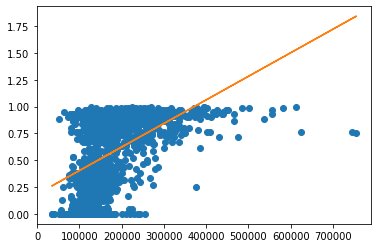

In [76]:
from sklearn.metrics import mean_squared_error

X_train = train_df.drop(['SalePrice'], axis=1)
plt.plot(y_train, X_train['AdjRemodAdd'], 'o')
m, b = np.polyfit(y_train, X_train['AdjRemodAdd'], 1)
plt.plot(y_train, m*y_train + b)
print (mean_squared_error(y_train, m*y_train + b))


### Average Sale Price Feature

In [77]:
# Get the average of each year/month
df = train_df.groupby(['YrSold','MoSold'])[['SalePrice']].mean()
df = df.rename({'SalePrice': 'MonthMean'}, axis=1)

# get the rolling average spanning 3 months
qt = (df[['MonthMean']] + df[['MonthMean']].shift(1) + df[['MonthMean']].shift(-1)) / 3
df['QuarterMean'] = qt['MonthMean']
df['QuarterMean'] = df['QuarterMean'].fillna(df['MonthMean'])
print(df)

                   MonthMean    QuarterMean
YrSold MoSold                              
2006   1       201090.000000  201090.000000
       2       194322.222222  193464.807407
       3       184982.200000  184539.079012
       4       174312.814815  172741.101429
       5       158928.289474  168508.145874
       6       172283.333333  171474.227503
       7       183211.059701  183911.449852
       8       196239.956522  201073.294297
       9       223768.866667  197455.177174
       10      172356.708333  203136.858333
       11      213285.000000  190395.569444
       12      185545.000000  194021.538462
2007   1       183234.615385  181693.788462
       2       176301.750000  178701.382664
       3       176567.782609  174547.380435
       4       170772.608696  172404.634311
       5       169873.511628  173457.311294
       6       179725.813559  181665.389441
       7       195396.843137  186354.577232
       8       183941.075000  191623.912106
       9       195533.818182  19

In [78]:
# Merge the averages onto our datasets
for idx, d in enumerate(all_data):
    all_data[idx] = pd.merge(d, df, how='left', left_on=['YrSold','MoSold'], right_on=['YrSold','MoSold'])
    all_data[idx].drop(['MoSold', 'YrSold'], axis=1, inplace=True)
    
combined = pd.merge(combined, df, how='left', left_on=['YrSold','MoSold'], right_on=['YrSold','MoSold'])
combined.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

# Fix the reference since above we generated new references for all_data
train_df = all_data[0]
test_df = all_data[1]

In [79]:
# Normalize the values and drop the old ones

for d in all_data:
    d['QuarterMeanNorm'] = (d['QuarterMean']-combined['QuarterMean'].mean())/combined['QuarterMean'].std()
    d['MonthMeanNorm'] = (d['MonthMean']-combined['MonthMean'].mean())/combined['MonthMean'].std()
    #d.drop(['QuarterMean','MonthMean'], axis=1, inplace=True)

combined['QuarterMeanNorm'] = (combined['QuarterMean']-combined['QuarterMean'].mean())/combined['QuarterMean'].std()
combined['MonthMeanNorm'] = (combined['MonthMean']-combined['MonthMean'].mean())/combined['MonthMean'].std()
#combined.drop(['QuarterMean','MonthMean'], axis=1, inplace=True)

### Exterior

In [80]:
ex1_map = {'Other': 0, 'BrkFace': 1, 'CemntBd': 2, 'Plywood': 3, 'Wd Sdng': 4, 'MetalSd': 5, 'HdBoard': 6, 'VinylSd': 7}
ex2_map = {'Other': 0, 'AsbShng': 1, 'BrkFace': 2, 'Stucco': 3, 'Wd Shng': 4, 'CmentBd': 5, 'Plywood': 7, 'Wd Sdng': 8, 'HdBoard': 9, 'MetalSd': 10, 'VinylSd': 11}
max_map = {'None': 0, 'BrkCmn': 1, 'Stone': 2, 'BrkFace': 3}
exg_map = {'Po': 0.0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1.0}

combined['MasVnrArea'] = combined['MasVnrArea'].fillna(0)

for d in all_data:
    d['Exterior1st'] = d['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
    d['Exterior1st'] = d['Exterior1st'].replace(['AsphShn','CBlock','ImStucc','BrkComm','Stone','AsbShng','Stucco','WdShing'], 'Other')
    d['Exterior1st'] = d['Exterior1st'].map(ex1_map)
    d['Exterior2nd'] = d['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])
    d['Exterior2nd'] = d['Exterior2nd'].replace(['CBlock','AsphShn','Stone','Brk Cmn','ImStucc'], 'Other')
    d['Exterior2nd'] = d['Exterior2nd'].map(ex2_map)
    d['MasVnrType'] = d['MasVnrType'].fillna('None')
    d['MasVnrType'] = d['MasVnrType'].map(max_map)
    d['MasVnrArea'] = d['MasVnrArea'].fillna(0)
    d['MasVnrArea'] = (d['MasVnrArea'] - combined['MasVnrArea'].min()) \
                      / (combined['MasVnrArea'].max()-combined['MasVnrArea'].min())
    d['ExterQual'] = d['ExterQual'].map(exg_map)
    d['ExterCond'] = d['ExterCond'].map(exg_map)

combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
combined['Exterior1st'] = combined['Exterior1st'].replace(['AsphShn','CBlock','ImStucc','BrkComm','Stone','AsbShng','Stucco','WdShing'], 'Other')
combined['Exterior1st'] = combined['Exterior1st'].map(ex1_map)
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])
combined['Exterior2nd'] = combined['Exterior2nd'].replace(['CBlock','AsphShn','Stone','Brk Cmn','ImStucc'], 'Other')
combined['Exterior2nd'] = combined['Exterior2nd'].map(ex2_map)
combined['MasVnrType'] = combined['MasVnrType'].fillna('None')
combined['MasVnrType'] = combined['MasVnrType'].map(max_map)
combined['MasVnrArea'] = (combined['MasVnrArea'] - combined['MasVnrArea'].min()) \
                         / (combined['MasVnrArea'].max()-combined['MasVnrArea'].min())
combined['ExterQual'] = combined['ExterQual'].map(exg_map)
combined['ExterCond'] = combined['ExterCond'].map(exg_map)

### Foundation and Basement

In [81]:
fnd_map = {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Other': 3, 'PConc': 4}
bsm_map = {'Po': 0.0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1.0}
bex_map = {'NA': 0.0, 'No': 0.25, 'Mn': 0.5, 'Av': 0.75, 'Gd': 1.0}
bfi_map = {'NA': 0.0, 'Unf': 0.17, 'LwQ': 0.33, 'Rec': 0.5, 'BLQ': 0.67, 'ALQ': 0.83, 'GLQ': 1.0}

combined['BsmtFinSF1'] = combined['BsmtFinSF1'].fillna(0)
combined['BsmtFinSF2'] = combined['BsmtFinSF2'].fillna(0)
combined['BsmtUnfSF'] = combined['BsmtUnfSF'].fillna(0)
combined['TotalBsmtSF'] = combined['TotalBsmtSF'].fillna(0)
combined['BsmtFullBath'] = combined['BsmtFullBath'].fillna(0)
combined['BsmtHalfBath'] = combined['BsmtFullBath'].fillna(0)

for d in all_data:
    d['Foundation'] = d['Foundation'].replace(['Stone', 'Wood'], 'Other')
    d['Foundation'] = d['Foundation'].map(fnd_map)
    d['BsmtQual'] = d['BsmtQual'].fillna('Po')
    d['BsmtQual'] = d['BsmtQual'].map(bsm_map)
    d['BsmtCond'] = d['BsmtCond'].fillna('Po')
    d['BsmtCond'] = d['BsmtCond'].map(bsm_map)
    d['BsmtExposure'] = d['BsmtExposure'].fillna('NA')
    d['BsmtExposure'] = d['BsmtExposure'].map(bex_map)
    d['BsmtFinType1'] = d['BsmtFinType1'].fillna('NA')
    d['BsmtFinType1'] = d['BsmtFinType1'].map(bfi_map)
    d['BsmtFinType2'] = d['BsmtFinType2'].fillna('NA')
    d['BsmtFinType2'] = d['BsmtFinType2'].map(bfi_map)
    d['BsmtFinSF1'] = d['BsmtFinSF1'].fillna(0)
#     d['BsmtFinSF1'] = (d['BsmtFinSF1'] - combined['BsmtFinSF1'].min()) \
#                       / (combined['BsmtFinSF1'].max()-combined['BsmtFinSF1'].min())
    d['BsmtFinSF1'] = (d['BsmtFinSF1']-combined['BsmtFinSF1'].mean())/combined['BsmtFinSF1'].std()
    d['BsmtFinSF2'] = d['BsmtFinSF2'].fillna(0)
#     d['BsmtFinSF2'] = (d['BsmtFinSF2'] - combined['BsmtFinSF2'].min()) \
#                       / (combined['BsmtFinSF2'].max()-combined['BsmtFinSF2'].min())
    d['BsmtFinSF2'] = (d['BsmtFinSF2']-combined['BsmtFinSF2'].mean())/combined['BsmtFinSF2'].std()
    d['BsmtUnfSF'] = d['BsmtUnfSF'].fillna(0)
#     d['BsmtUnfSF'] = (d['BsmtUnfSF'] - combined['BsmtUnfSF'].min()) \
#                       / (combined['BsmtUnfSF'].max()-combined['BsmtUnfSF'].min())
    d['BsmtUnfSF'] = (d['BsmtUnfSF']-combined['BsmtUnfSF'].mean())/combined['BsmtUnfSF'].std()
    d['TotalBsmtSF'] = d['TotalBsmtSF'].fillna(0)
#     d['TotalBsmtSF'] = (d['TotalBsmtSF'] - combined['TotalBsmtSF'].min()) \
#                       / (combined['TotalBsmtSF'].max()-combined['TotalBsmtSF'].min())
    d['TotalBsmtSF'] = (d['TotalBsmtSF']-combined['TotalBsmtSF'].mean())/combined['TotalBsmtSF'].std()
    d['BsmtFullBath'] = d['BsmtFullBath'].fillna(0)
    d['BsmtHalfBath'] = d['BsmtFullBath'].fillna(0)
    d['BsmtFullBath'] = (d['BsmtFullBath']-combined['BsmtFullBath'].mean())/combined['BsmtFullBath'].std()
    d['BsmtHalfBath'] = (d['BsmtHalfBath']-combined['BsmtHalfBath'].mean())/combined['BsmtHalfBath'].std()

combined['Foundation'] = combined['Foundation'].replace(['Stone', 'Wood'], 'Other')
combined['Foundation'] = combined['Foundation'].map(fnd_map)
combined['BsmtQual'] = combined['BsmtQual'].fillna('Po')
combined['BsmtQual'] = combined['BsmtQual'].map(bsm_map)
combined['BsmtCond'] = combined['BsmtCond'].fillna('Po')
combined['BsmtCond'] = combined['BsmtCond'].map(bsm_map)
combined['BsmtExposure'] = combined['BsmtExposure'].fillna('NA')
combined['BsmtExposure'] = combined['BsmtExposure'].map(bex_map)
combined['BsmtFinType1'] = combined['BsmtFinType1'].fillna('NA')
combined['BsmtFinType1'] = combined['BsmtFinType1'].map(bfi_map)
combined['BsmtFinType2'] = combined['BsmtFinType2'].fillna('NA')
combined['BsmtFinType2'] = combined['BsmtFinType2'].map(bfi_map)
# combined['BsmtFinSF1'] = (combined['BsmtFinSF1'] - combined['BsmtFinSF1'].min()) \
#                          / (combined['BsmtFinSF1'].max()-combined['BsmtFinSF1'].min())
combined['BsmtFinSF1'] = (combined['BsmtFinSF1']-combined['BsmtFinSF1'].mean())/combined['BsmtFinSF1'].std()
# combined['BsmtFinSF2'] = (combined['BsmtFinSF2'] - combined['BsmtFinSF2'].min()) \
#                          / (combined['BsmtFinSF2'].max()-combined['BsmtFinSF2'].min())
combined['BsmtFinSF2'] = (combined['BsmtFinSF2']-combined['BsmtFinSF2'].mean())/combined['BsmtFinSF2'].std()
# combined['BsmtUnfSF'] = (combined['BsmtUnfSF'] - combined['BsmtUnfSF'].min()) \
#                          / (combined['BsmtUnfSF'].max()-combined['BsmtUnfSF'].min())
combined['BsmtUnfSF'] = (combined['BsmtUnfSF']-combined['BsmtUnfSF'].mean())/combined['BsmtUnfSF'].std()
# combined['TotalBsmtSF'] = (combined['TotalBsmtSF'] - combined['TotalBsmtSF'].min()) \
#                          / (combined['TotalBsmtSF'].max()-combined['TotalBsmtSF'].min())
combined['TotalBsmtSF'] = (combined['TotalBsmtSF']-combined['TotalBsmtSF'].mean())/combined['TotalBsmtSF'].std()
combined['BsmtFullBath'] = (combined['BsmtFullBath']-combined['BsmtFullBath'].mean())/combined['BsmtFullBath'].std()
combined['BsmtHalfBath'] = (combined['BsmtHalfBath']-combined['BsmtHalfBath'].mean())/combined['BsmtHalfBath'].std()

### Heating / Cooling

In [82]:
ht_map = {'Po': 0.0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1.0}
yn_map = {'N': 0, 'Y': 1}

for d in all_data:
    d['HeatingQC'] = d['HeatingQC'].map(ht_map)
    d['CentralAir'] = d['CentralAir'].map(yn_map)
    
combined['HeatingQC'] = combined['HeatingQC'].map(ht_map)
combined['CentralAir'] = combined['CentralAir'].map(yn_map)

### Floor Sizes and Room Conditions

In [83]:
rqc_map = {'Po': 0.0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1.0}

for d in all_data:
    d['OverallQual'] = (d['OverallQual'] - combined['OverallQual'].min()) \
                       / (combined['OverallQual'].max()-combined['OverallQual'].min())
    d['OverallCond'] = (d['OverallCond'] - combined['OverallCond'].min()) \
                       / (combined['OverallCond'].max()-combined['OverallCond'].min())
#     d['1stFlrSF'] = (d['1stFlrSF'] - combined['1stFlrSF'].min()) \
#                     / (combined['1stFlrSF'].max()-combined['1stFlrSF'].min())
    d['1stFlrSF'] = (d['1stFlrSF']-combined['1stFlrSF'].mean())/combined['1stFlrSF'].std()
#     d['2ndFlrSF'] = (d['2ndFlrSF'] - combined['2ndFlrSF'].min()) \
#                     / (combined['2ndFlrSF'].max()-combined['2ndFlrSF'].min())
    d['2ndFlrSF'] = (d['2ndFlrSF']-combined['2ndFlrSF'].mean())/combined['2ndFlrSF'].std()
#     d['LowQualFinSF'] = (d['LowQualFinSF'] - combined['LowQualFinSF'].min()) \
#                     / (combined['LowQualFinSF'].max()-combined['LowQualFinSF'].min())
    d['LowQualFinSF'] = (d['LowQualFinSF']-combined['LowQualFinSF'].mean())/combined['LowQualFinSF'].std()
#     d['GrLivArea'] = (d['GrLivArea'] - combined['GrLivArea'].min()) \
#                     / (combined['GrLivArea'].max()-combined['GrLivArea'].min())
    d['GrLivArea'] = (d['GrLivArea']-combined['GrLivArea'].mean())/combined['GrLivArea'].std()
    d['KitchenQual'] = d['KitchenQual'].fillna(d['KitchenQual'].mode()[0])
    d['KitchenQual'] = d['KitchenQual'].map(rqc_map)
    d['FireplaceQu'] = d['FireplaceQu'].fillna('Po')
    d['FireplaceQu'] = d['FireplaceQu'].map(rqc_map)
    d['FullBath'] = (d['FullBath']-combined['FullBath'].mean())/combined['FullBath'].std()
    d['HalfBath'] = (d['HalfBath']-combined['HalfBath'].mean())/combined['HalfBath'].std()
    d['BedroomAbvGr'] = (d['BedroomAbvGr']-combined['BedroomAbvGr'].mean())/combined['BedroomAbvGr'].std()
    d['KitchenAbvGr'] = (d['KitchenAbvGr']-combined['KitchenAbvGr'].mean())/combined['KitchenAbvGr'].std()
    d['Fireplaces'] = (d['Fireplaces']-combined['Fireplaces'].mean())/combined['Fireplaces'].std()
    d['TotRmsAbvGrd'] = (d['TotRmsAbvGrd']-combined['TotRmsAbvGrd'].mean())/combined['TotRmsAbvGrd'].std()

combined['OverallQual'] = (combined['OverallQual'] - combined['OverallQual'].min()) \
                         / (combined['OverallQual'].max()-combined['OverallQual'].min())
combined['OverallCond'] = (combined['OverallCond'] - combined['OverallCond'].min()) \
                         / (combined['OverallCond'].max()-combined['OverallCond'].min())
# combined['1stFlrSF'] = (combined['1stFlrSF'] - combined['1stFlrSF'].min()) \
#                          / (combined['1stFlrSF'].max()-combined['1stFlrSF'].min())
combined['1stFlrSF'] = (combined['1stFlrSF']-combined['1stFlrSF'].mean())/combined['1stFlrSF'].std()
# combined['2ndFlrSF'] = (combined['2ndFlrSF'] - combined['2ndFlrSF'].min()) \
#                          / (combined['2ndFlrSF'].max()-combined['2ndFlrSF'].min())
combined['2ndFlrSF'] = (combined['2ndFlrSF']-combined['2ndFlrSF'].mean())/combined['2ndFlrSF'].std()
# combined['LowQualFinSF'] = (combined['LowQualFinSF'] - combined['LowQualFinSF'].min()) \
#                          / (combined['LowQualFinSF'].max()-combined['LowQualFinSF'].min())
combined['LowQualFinSF'] = (combined['LowQualFinSF']-combined['LowQualFinSF'].mean())/combined['LowQualFinSF'].std()
# combined['GrLivArea'] = (combined['GrLivArea'] - combined['GrLivArea'].min()) \
#                          / (combined['GrLivArea'].max()-combined['GrLivArea'].min())
combined['GrLivArea'] = (combined['GrLivArea']-combined['GrLivArea'].mean())/combined['GrLivArea'].std()
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])
combined['KitchenQual'] = combined['KitchenQual'].map(rqc_map)
combined['FireplaceQu'] = combined['FireplaceQu'].fillna('Po')
combined['FireplaceQu'] = combined['FireplaceQu'].map(rqc_map)
combined['FullBath'] = (combined['FullBath']-combined['FullBath'].mean())/combined['FullBath'].std()
combined['HalfBath'] = (combined['HalfBath']-combined['HalfBath'].mean())/combined['HalfBath'].std()
combined['BedroomAbvGr'] = (combined['BedroomAbvGr']-combined['BedroomAbvGr'].mean())/combined['BedroomAbvGr'].std()
combined['KitchenAbvGr'] = (combined['KitchenAbvGr']-combined['KitchenAbvGr'].mean())/combined['KitchenAbvGr'].std()
combined['Fireplaces'] = (combined['Fireplaces']-combined['Fireplaces'].mean())/combined['Fireplaces'].std()
combined['TotRmsAbvGrd'] = (combined['TotRmsAbvGrd']-combined['TotRmsAbvGrd'].mean())/combined['TotRmsAbvGrd'].std()

### Garage

In [84]:
grt_map = {'None': 0, 'Detchd': 1, 'Other': 2, 'Attchd': 3, 'BuiltIn': 4}
grf_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
gqc_map = {'Po': 0.0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1.0}
pdr_map = {'N': 0.0, 'P': 0.5, 'Y': 1.0}

combined['GarageCars'] = combined['GarageCars'].fillna(0)
combined['GarageArea'] = combined['GarageArea'].fillna(0)

for d in all_data:
    d['GarageType'] = d['GarageType'].fillna('None')
    d['GarageType'] = d['GarageType'].replace(['CarPort', '2Types', 'Basment'], 'Other')
    d['GarageType'] = d['GarageType'].map(grt_map)
    d['GarageFinish'] = d['GarageFinish'].fillna('None')
    d['GarageFinish'] = d['GarageFinish'].map(grf_map)
    d['GarageCars'] = d['GarageCars'].fillna(0)
    d['GarageCars'] = (d['GarageCars']-combined['GarageCars'].mean())/combined['GarageCars'].std()
    d['GarageArea'] = d['GarageArea'].fillna(0)
    d['GarageArea'] = (d['GarageArea']-combined['GarageArea'].mean())/combined['GarageArea'].std()
    d['GarageQual'] = d['GarageQual'].fillna('Po')
    d['GarageQual'] = d['GarageQual'].map(gqc_map)
    d['GarageCond'] = d['GarageCond'].fillna('Po')
    d['GarageCond'] = d['GarageCond'].map(gqc_map)
    d['PavedDrive'] = d['PavedDrive'].map(pdr_map)
    
combined['GarageType'] = combined['GarageType'].fillna('None')
combined['GarageType'] = combined['GarageType'].replace(['CarPort', '2Types', 'Basment'], 'Other')
combined['GarageType'] = combined['GarageType'].map(grt_map)
combined['GarageFinish'] = combined['GarageFinish'].fillna('None')
combined['GarageFinish'] = combined['GarageFinish'].map(grf_map)
combined['GarageCars'] = (combined['GarageCars']-combined['GarageCars'].mean())/combined['GarageCars'].std()
combined['GarageArea'] = (combined['GarageArea']-combined['GarageArea'].mean())/combined['GarageArea'].std()
combined['GarageQual'] = combined['GarageQual'].fillna('Po')
combined['GarageQual'] = combined['GarageQual'].map(gqc_map)
combined['GarageCond'] = combined['GarageCond'].fillna('Po')
combined['GarageCond'] = combined['GarageCond'].map(gqc_map)
combined['PavedDrive'] = combined['PavedDrive'].map(pdr_map)

### Other Features

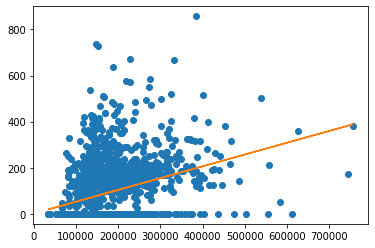

In [85]:
plt.plot(y_train, X_train['WoodDeckSF'], 'o')
m, b = np.polyfit(y_train, X_train['WoodDeckSF'], 1)
plt.plot(y_train, m*y_train + b)

In [86]:
for d in all_data:
    d['WoodDeckSF'] = (d['WoodDeckSF']-combined['WoodDeckSF'].mean())/combined['WoodDeckSF'].std()
    d['OpenPorchSF'] = (d['OpenPorchSF']-combined['OpenPorchSF'].mean())/combined['OpenPorchSF'].std()
    
combined['WoodDeckSF'] = (combined['WoodDeckSF']-combined['WoodDeckSF'].mean())/combined['WoodDeckSF'].std()
combined['OpenPorchSF'] = (combined['OpenPorchSF']-combined['OpenPorchSF'].mean())/combined['OpenPorchSF'].std()

### Sale Info

In [87]:
sac_map = {'Other': 0, 'Abnorml': 1, 'Normal': 2, 'Partial': 3}

for d in all_data:
    d['SaleCondition'] = d['SaleCondition'].replace(['AdjLand', 'Family', 'Alloca'], 'Other')
    d['SaleCondition'] = d['SaleCondition'].map(sac_map)
    
combined['SaleCondition'] = combined['SaleCondition'].replace(['AdjLand', 'Family', 'Alloca'], 'Other')
combined['SaleCondition'] = combined['SaleCondition'].map(sac_map)

## Results

In [88]:
pd.set_option('display.max_columns', None)
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,NeighborhoodLotArea,NeighborhoodBldgType,TotalSquareFeet,NeighborhoodHouseStyle,OverallQualNCond,NeighborhoodOverallQualNCond,AdjRemodAdd,MonthMean,QuarterMean,QuarterMeanNorm,MonthMeanNorm
0,1,15,2,0.216038,-0.217841,1,17,5,7,0.666667,0.500,7,11,3,0.12250,0.75,0.5,4,0.75,0.50,0.25,1.00,0.581046,0.17,-0.292975,-0.934005,-0.443002,1.00,1,-0.773728,1.207172,-0.10118,0.413476,1.087148,1.087148,0.781232,1.232388,0.169898,-0.207663,0.75,0.986680,-0.924153,0.00,3,2,0.306987,0.349304,0.50,0.5,1.0,-0.740634,0.199972,2,208500,0.0341172,0.674797,0.000096,0.676301,0.382022,0.387659,0.883333,159370.000000,172126.656695,-0.850613,-1.498328
1,2,12,2,0.664045,-0.072032,2,21,5,6,0.555556,0.875,5,10,0,0.00000,0.50,0.5,2,0.75,0.50,1.00,0.83,1.178053,0.17,-0.292975,-0.629176,0.477381,1.00,1,0.261030,-0.784891,-0.10118,-0.471810,-0.818789,-0.818789,0.781232,-0.756191,0.169898,-0.207663,0.50,-0.287709,0.623525,0.50,3,2,0.306987,-0.058981,0.50,0.5,1.0,1.614603,-0.702722,2,181500,0.0377922,0.837398,0.169728,0.716763,0.528090,0.661972,0.433333,169873.511628,173457.311294,-0.721405,-0.778635
2,3,15,2,0.305639,0.137173,1,17,5,7,0.666667,0.500,7,11,3,0.10125,0.75,0.5,4,0.75,0.50,0.50,1.00,0.098173,0.17,-0.292975,-0.287950,-0.297917,1.00,1,-0.610614,1.235163,-0.10118,0.563659,1.087148,1.087148,0.781232,1.232388,0.169898,-0.207663,0.75,-0.287709,0.623525,0.50,3,2,0.306987,0.627680,0.50,0.5,1.0,-0.740634,-0.081195,2,223500,0.044242,0.674797,0.202039,0.676301,0.382022,0.387659,0.866667,169626.470588,177464.690823,-0.332283,-0.795562
3,4,10,2,0.066702,-0.078371,3,18,5,7,0.666667,0.500,4,4,0,0.00000,0.50,0.5,1,0.50,0.75,0.25,0.83,-0.494445,0.17,-0.292975,-0.046816,-0.669697,0.75,1,-0.506118,0.978574,-0.10118,0.427309,1.087148,1.087148,-1.027187,-0.756191,0.169898,-0.207663,0.75,0.349486,0.623525,0.75,1,1,1.618986,0.785426,0.50,0.5,1.0,-0.740634,-0.184783,1,140000,0.0379633,0.715447,0.001106,0.716763,0.382022,0.410463,0.333333,194322.222222,193464.807407,1.221349,0.896576
4,5,15,2,0.783513,0.518814,2,25,5,7,0.777778,0.500,7,11,3,0.21875,0.75,0.5,4,0.75,0.50,0.75,1.00,0.469107,0.17,-0.292975,-0.160558,0.212148,1.00,1,-0.037164,1.671364,-0.10118,1.377806,1.087148,1.087148,0.781232,1.232388,1.385418,-0.207663,0.75,1.623875,0.623525,0.50,3,2,1.618986,1.685509,0.50,0.5,1.0,0.776834,0.540332,2,250000,0.0620893,1,1.269310,1,0.438202,0.653924,0.833333,175600.000000,192105.519608,1.089360,-0.386259
5,6,7,2,0.813380,0.500430,1,12,5,3,0.444444,0.500,7,11,0,0.00000,0.50,0.5,3,0.75,0.50,0.25,1.00,0.638113,0.17,-0.292975,-1.129641,-0.579019,1.00,1,-0.926648,0.535376,-0.10118,-0.274201,1.087148,1.087148,-1.027187,1.232388,-2.261142,-0.207663,0.50,-0.924904,-0.924153,0.00,3,1,0.306987,0.033811,0.50,0.5,1.0,-0.424494,-0.258774,2,143000,0.0504043,0.471545,-0.440141,0.196532,0.269663,0.193159,0.750000,175206.592593,176145.920258,-0.460338,-0.413215
6,7,12,2,0.514709,-0.010665,1,20,5,6,0.777778,0.500,7,11,2,0.11625,0.75,0.5,4,1.00,0.50,0.75,1.00,2.036251,0.17,-0.292975,-0.554106,1.438570,1.00,1,1.362054,-0.784891,-0.10118,0.381859,1.087148,1.087148,0.781232,-0.756191,0.169898,-0.207663,0.75,0.349486,0.623525,0.75,3,2,0.306987,0.757589,0.50,0.5,1.0,1.274753,0.140779,2,307000,0.0399721,0.796748,1.168338,0.682081,0.438202,0.523139,0.916667,183941.075000,191623.912106,1.042595,0.185266
7,8,15,2,-1.725325,0.027119,3,14,5,7,0.666667,0.625,6,9,2,0.15000,0.50,0.5,2,0.75,0.50,0.50,0.83,0.916862,0.67,-0.10

In [89]:
field = 'SaleCondition'
print(f'{combined[field].isnull().sum()} or {combined[field].isnull().sum() / 2919. * 100}% empty')
train_df.groupby(field)['SalePrice'].describe().sort_values('mean')

0 or 0.0% empty


,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
1,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
0,36.0,150473.027778,62336.363590,55993.0,108719.25,135500.0,173000.0,359100.0
2,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
3,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


# Output new files

In [90]:
train_df.to_csv('new_train.csv', index=False)
test_df.to_csv('new_test.csv', index=False)
print("New files have been created.")

New files have been created.
